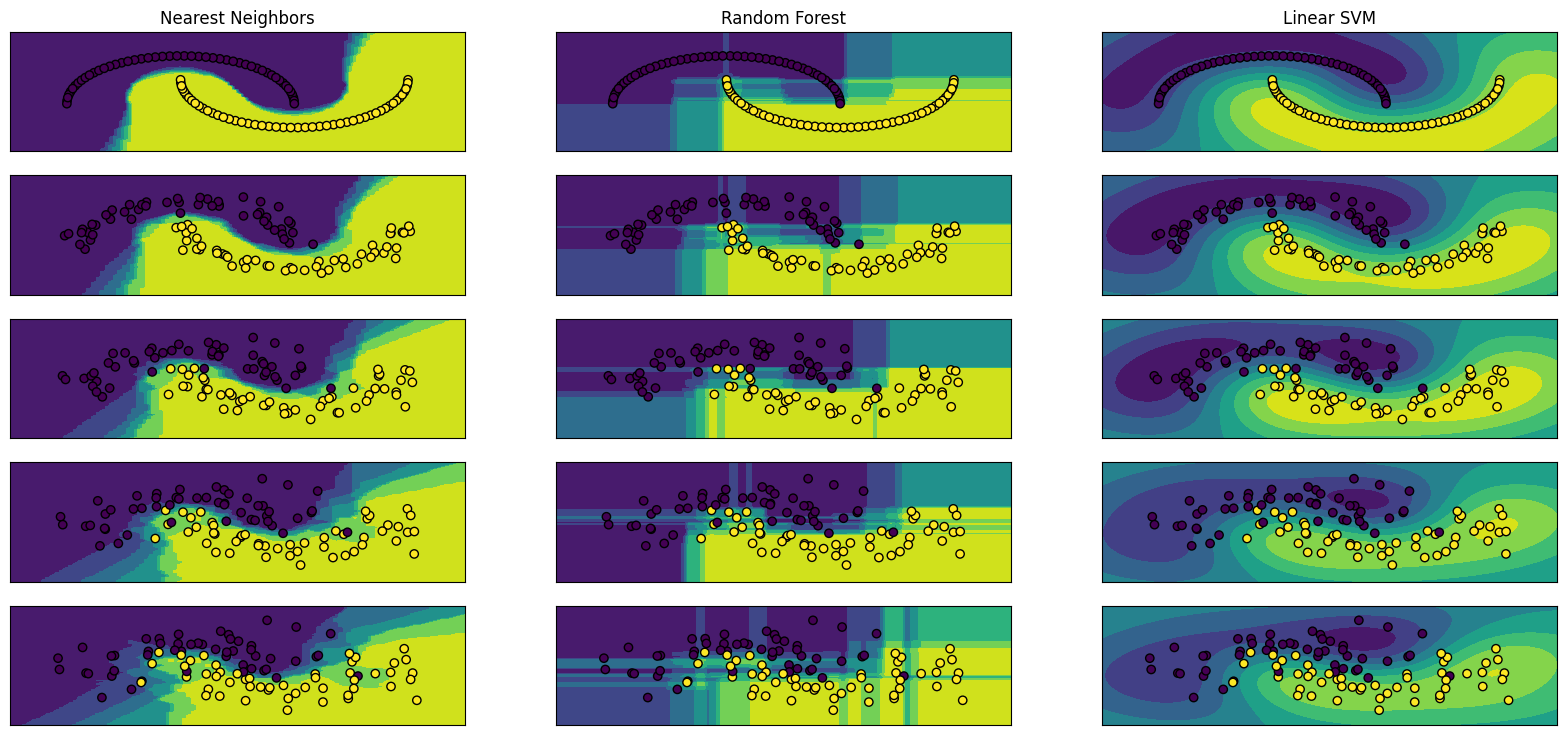

In [2]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import TME1
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.animation as animation

X, y = TME1.datasets[2]
clf = KNeighborsClassifier().fit(X, y)
obs = X[6]


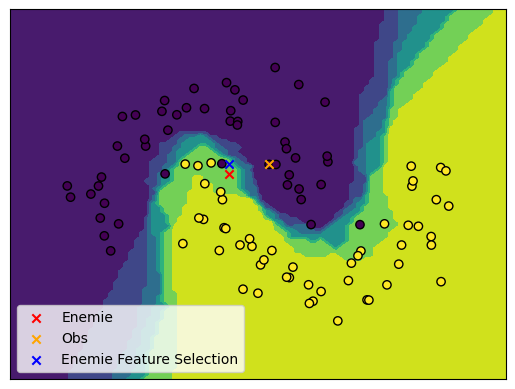

In [3]:
fig, ax = plt.subplots()
t = TME1.GrowingSpheres(clf, 2, 100)
enemie, enemie_feature_selection = t.predict(obs)
TME1.plot_boundaries(X, y, ax, clf)
ax.scatter(*enemie, c="red", marker='x', label='Enemie')
ax.scatter(*obs, c="orange", marker='x', label='Obs')
ax.scatter(*enemie_feature_selection, c="blue", marker='x', label='Enemie Feature Selection')
ax.legend()

[0.11803961 0.51000849] [0.11803961 0.51000849]
[0.55259266 0.51000849] [0.11803961 0.48076807]


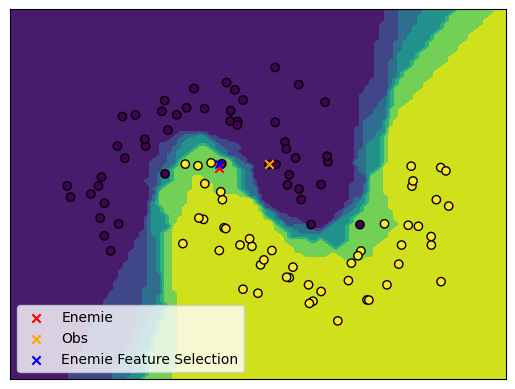

In [8]:
fig, ax = plt.subplots()
t = TME1.GrowingSpheres(obs, clf, 2, 100)
enemie = t.generation()
TME1.plot_boundaries(X, y, ax, clf)
enemie_feature_selection = t.feature_selection(enemie)
enemie_feature_selection2 = t.feature_selection2(enemie)
print(enemie_feature_selection, enemie_feature_selection2)
print(obs, enemie)
ax.scatter(*enemie, c="red", marker='x', label='Enemie')
ax.scatter(*obs, c="orange", marker='x', label='Obs')
ax.scatter(*enemie_feature_selection, c="blue", marker='x', label='Enemie Feature Selection')
ax.legend()

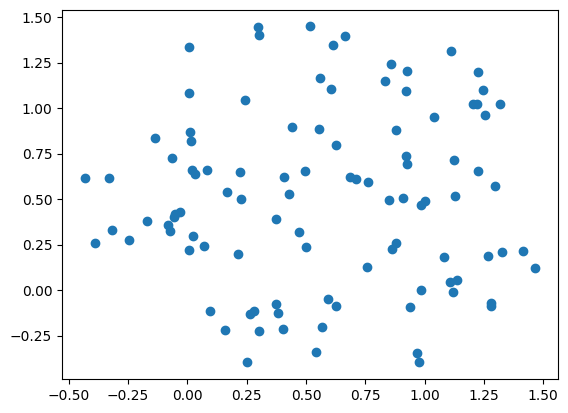

In [5]:
sph = t.generate_spherical_layer(0, 1)
sph
plt.scatter(sph[:, 0], sph[:, 1])
